In [1]:
import multiprocessing
from joblib import delayed, Parallel
%matplotlib inline
from main import knn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def cartesian(x_1, x_2):
    diffs = sum([(comp_x_1i - comp_x_2i)**2 for comp_x_1i, comp_x_2i in zip(x_1, x_2)])
    return math.sqrt(diffs)

<Figure size 432x288 with 0 Axes>

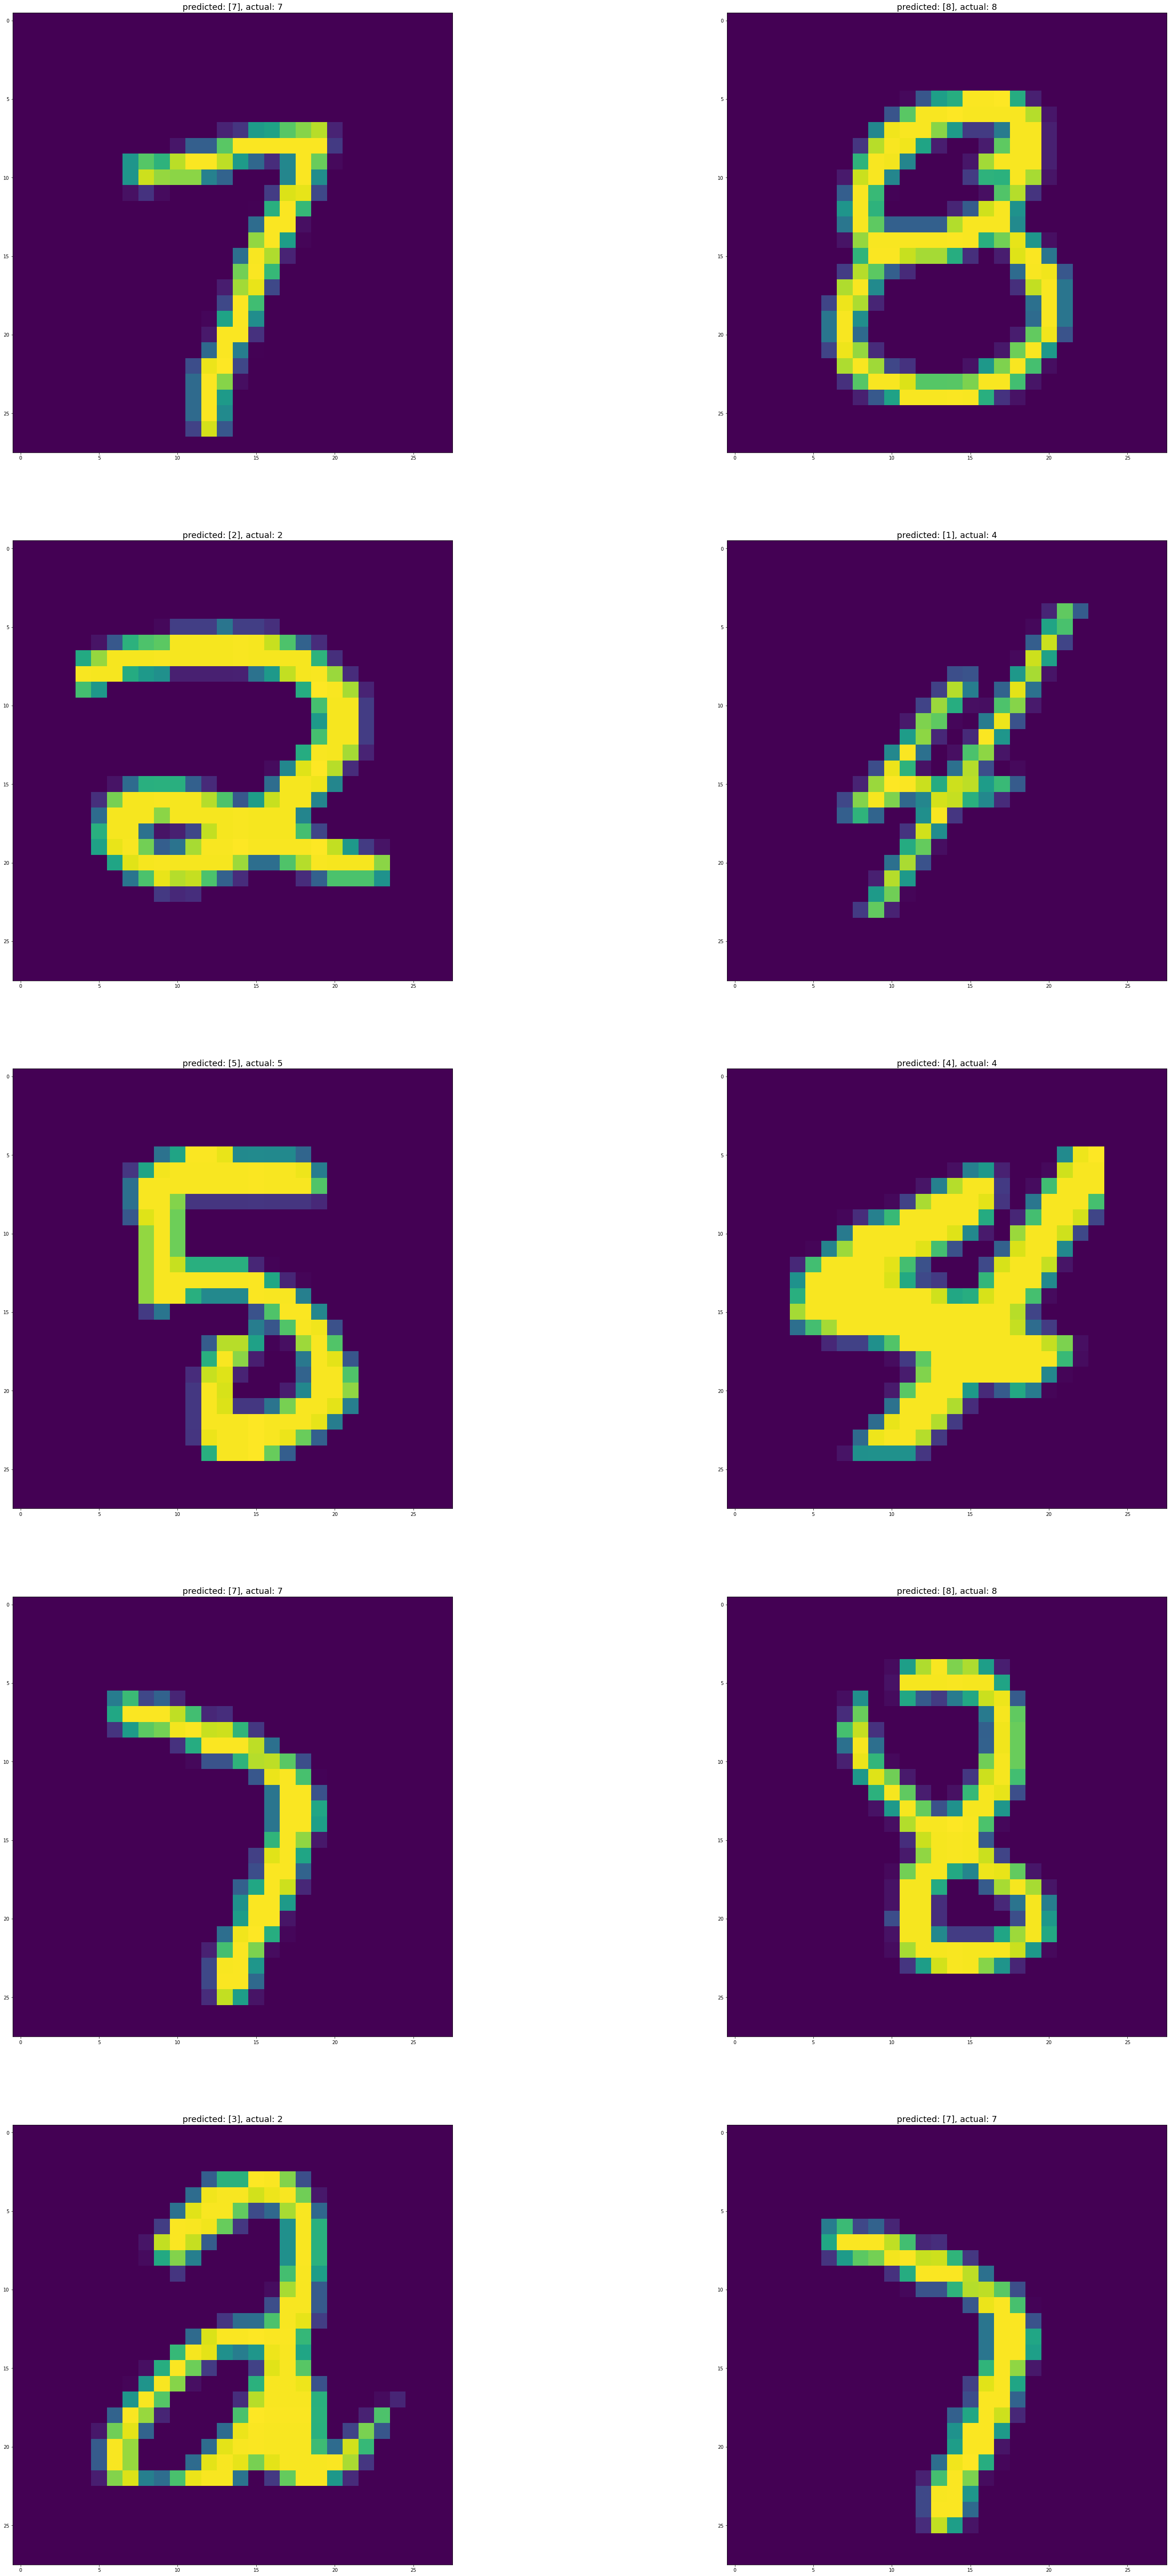

In [3]:
train_data_X = pd.read_csv("MNIST_train_small.csv").to_numpy()[:, 1:]
train_data_y = pd.read_csv("MNIST_train_small.csv").to_numpy()[:, 0]
test_data_X = pd.read_csv("MNIST_test_small.csv").to_numpy()[:, 1:]
test_data_y = pd.read_csv("MNIST_test_small.csv").to_numpy()[:, 0]

n_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs=n_cores)(delayed(knn)(train_data_X, train_data_y, [test_point], cartesian, 3)
                                   for test_point in test_data_X)

plt.tight_layout()

fig, axs = plt.subplots(5, 2, figsize=(50, 100))
axs = axs.ravel()

# Pick items at random to show
for i in range(5*2):
    idx = np.random.randint(len(results))
    result = results[idx]

    axs[i].imshow(test_data_X[idx].reshape(28, 28))
    axs[i].set_title(f"predicted: {result}, actual: {test_data_y[idx]}", {"fontsize": 18})

plt.show()